### Introduction
Flight delays not only irritate air passengers and disrupt their schedules but also cause :

a decrease in efficiency
an increase in capital costs, reallocation of flight crews and aircraft
an additional crew expenses
As a result, on an aggregate basis, an airline's record of flight delays may have a negative impact on passenger demand.

This competition aims to predict the estimated duration of flight delays per flight

This solution proposes to build a flight delay predictive model using Machine Learning techniques. The accurate prediction of flight delays will help all players in the air travel ecosystem to set up effective action plans to reduce the impact of the delays and avoid loss of time, capital and resources.

Tunisair is the flag carrier airline of Tunisia. Formed in 1948, it operates scheduled international services to four continents. Its main base is Tunis–Carthage International Airport. The airline's head office is in Tunis, near Tunis Airport. Tunisair is a member of the Arab Air Carriers Organization

#### Evaluation
The metric used for this challenge is Root Mean Square Error.

#### Import Libraries

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [40]:
# Load the training dataset
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')


### 1. Data Exploration:


In [41]:
# Display the first few rows
print(train_data.head())

# Get basic information about the dataset
print(train_data.info())


           ID       DATOP     FLTID DEPSTN ARRSTN                  STD  \
0  train_id_0  2016-01-03  TU 0712     CMN    TUN  2016-01-03 10:30:00   
1  train_id_1  2016-01-13  TU 0757     MXP    TUN  2016-01-13 15:05:00   
2  train_id_2  2016-01-16  TU 0214     TUN    IST  2016-01-16 04:10:00   
3  train_id_3  2016-01-17  TU 0480     DJE    NTE  2016-01-17 14:10:00   
4  train_id_4  2016-01-17  TU 0338     TUN    ALG  2016-01-17 14:30:00   

                   STA STATUS         AC  target  
0  2016-01-03 12.55.00    ATA  TU 32AIMN   260.0  
1  2016-01-13 16.55.00    ATA  TU 31BIMO    20.0  
2  2016-01-16 06.45.00    ATA  TU 32AIMN     0.0  
3  2016-01-17 17.00.00    ATA  TU 736IOK     0.0  
4  2016-01-17 15.50.00    ATA  TU 320IMU    22.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-

### Observations 

1. ##### DATOP, STD, STA Columns:

- The columns representing dates and times (DATOP, STD, STA) are currently of type object. It's recommended to convert them to the appropriate date-time data type using the pd.to_datetime function. This will allow for easier handling of date and time operations.

2. ##### ID Column:
- The ID column seems to be an identifier and is of type object, which is fine for identification purposes.


3. ##### FLTID, DEPSTN, ARRSTN, STATUS, AC Columns:

- These columns are categorical, and their current data type is object. I will these columns use machine learning algorithms, I will encode these categorical variables. 

In [42]:
# Set 'ID' column as the index
train_data.set_index('ID', inplace=True)


### Time-related Features:
Convert time-related features to datetime objects.
Explore patterns in scheduled and actual departure/arrival times.

In [43]:
print(train_data.columns)

Index(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC',
       'target'],
      dtype='object')


In [44]:
# Convert time-related features to datetime with custom format for 'STA'
train_data['DATOP'] = pd.to_datetime(train_data['DATOP'])
train_data['STD'] = pd.to_datetime(train_data['STD'])
train_data['STA'] = pd.to_datetime(train_data['STA'], format='%Y-%m-%d %H.%M.%S')

test_data['DATOP'] = pd.to_datetime(test_data['DATOP'])
test_data['STD'] = pd.to_datetime(test_data['STD'])
test_data['STA'] = pd.to_datetime(test_data['STA'], format='%Y-%m-%d %H.%M.%S')



I am going to split the datetime columns into separate features like day, month, and year, as they can often provide valuable information for time series analysis

In [53]:
test_data['DATOP_day'] = test_data['DATOP'].dt.day
test_data['DATOP_month'] = test_data['DATOP'].dt.month
test_data['DATOP_year'] = test_data['DATOP'].dt.year
test_data['STA_day'] = test_data['STA'].dt.day
test_data['STA_month'] = test_data['STA'].dt.month
test_data['STA_year'] = test_data['STA'].dt.year
test_data['STD_day'] = test_data['STD'].dt.day
test_data['STD_month'] = test_data['STD'].dt.month
test_data['STD_year'] = test_data['STD'].dt.year

### Explore Categorical Variables:


In [45]:
# Identify categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Display the number of unique values in each categorical column
for column in categorical_columns:
    unique_values_count = train_data[column].nunique()
    print(f"{column}: {unique_values_count} unique values")

FLTID: 1861 unique values
DEPSTN: 132 unique values
ARRSTN: 128 unique values
STATUS: 5 unique values
AC: 68 unique values


C:\Users\NdoMuteweri\AppData\Local\Temp\ipykernel_20600\3974103809.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot_encoded_data_test[column] = 0
C:\Users\NdoMuteweri\AppData\Local\Temp\ipykernel_20600\3974103809.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot_encoded_data_test[column] = 0
C:\Users\NdoMuteweri\AppData\Local\Temp\ipykernel_20600\3974103809.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

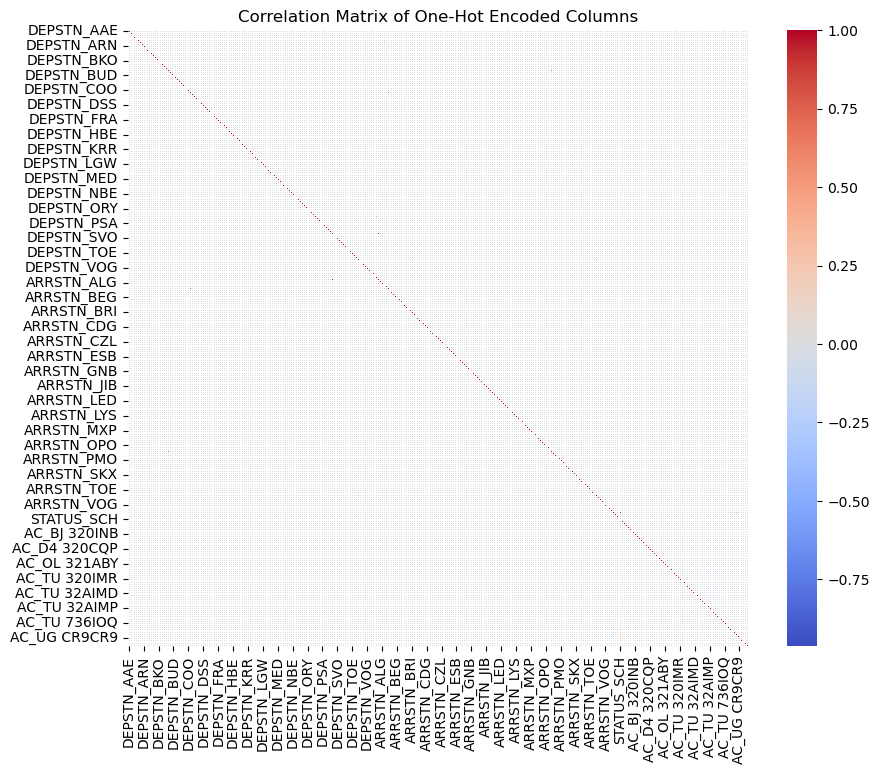

              DEPSTN_AAE  DEPSTN_AAL  DEPSTN_ABJ  DEPSTN_ADB  DEPSTN_AHU  \
DEPSTN_AAE      1.000000   -0.000009   -0.000267   -0.000009   -0.000066   
DEPSTN_AAL     -0.000009    1.000000   -0.000267   -0.000009   -0.000066   
DEPSTN_ABJ     -0.000267   -0.000267    1.000000   -0.000267   -0.001889   
DEPSTN_ADB     -0.000009   -0.000009   -0.000267    1.000000   -0.000066   
DEPSTN_AHU     -0.000066   -0.000066   -0.001889   -0.000066    1.000000   
...                  ...         ...         ...         ...         ...   
AC_UG CR9CR9   -0.000051   -0.000051   -0.001463   -0.000051   -0.000359   
AC_UG CR9ISA   -0.000081   -0.000081   -0.002344   -0.000081   -0.000576   
AC_UG CR9XXX   -0.000083   -0.000083   -0.002390   -0.000083   -0.000587   
AC_UJ 320TCF   -0.000041   -0.000041   -0.001194   -0.000041   -0.000293   
AC_X9 320VEB   -0.000033   -0.000033   -0.000963   -0.000033   -0.000237   

              DEPSTN_ALG  DEPSTN_AMM  DEPSTN_AMS  DEPSTN_ARN  DEPSTN_ATH  ...  \
DEPSTN

In [61]:
# List of selected categorical columns
selected_categorical_columns = ['DEPSTN', 'ARRSTN', 'STATUS', 'AC']

# Create a new DataFrame with selected columns
original_categorical_data = train_data[selected_categorical_columns]


# Perform one-hot encoding for the original categorical columns
one_hot_encoded_data = pd.get_dummies(original_categorical_data, columns=selected_categorical_columns)


# Select and one-hot encode categorical columns for the test set
original_categorical_data_test = test_data[selected_categorical_columns]
one_hot_encoded_data_test = pd.get_dummies(original_categorical_data_test, columns=selected_categorical_columns)

# Ensure that the test set has the same columns as the training set
missing_columns = set(X_train.columns) - set(one_hot_encoded_data_test.columns)
for column in missing_columns:
    one_hot_encoded_data_test[column] = 0

# Reorder the columns to match the order during training
one_hot_encoded_data_test = one_hot_encoded_data_test[X_train.columns]

# Compute the correlation matrix
correlation_matrix = one_hot_encoded_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of One-Hot Encoded Columns")
plt.show()

# Print the numeric representation of the correlation matrix
print(correlation_matrix)


### Descriptive Statistics:
Compute summary statistics to understand the central tendency, dispersion, and shape of the distribution of numerical features.

In [63]:
# Summary statistics
print(train_data.describe())


              target      DATOP_day    DATOP_month     DATOP_year  \
count  107833.000000  107833.000000  107833.000000  107833.000000   
mean       48.733013      15.956396       6.681211    2017.026346   
std       117.135562       8.884317       3.292267       0.813208   
min         0.000000       1.000000       1.000000    2016.000000   
25%         0.000000       8.000000       4.000000    2016.000000   
50%        14.000000      16.000000       7.000000    2017.000000   
75%        43.000000      24.000000       9.000000    2018.000000   
max      3451.000000      31.000000      12.000000    2018.000000   

             STA_day      STA_month       STA_year        STD_day  \
count  107833.000000  107833.000000  107833.000000  107833.000000   
mean       15.954995       6.681526    2017.026634      15.956396   
std         8.885298       3.292182       0.813456       8.884317   
min         1.000000       1.000000    2016.000000       1.000000   
25%         8.000000       4.0000

In [64]:
# Check the column names in train_data
print(train_data.columns)

# Extract selected features for training
selected_features = ['DATOP_day', 'DATOP_month', 'DATOP_year', 'STA_day', 'STA_month', 'STA_year',
                     'STD_day', 'STD_month', 'STD_year']

# Concatenate date-related features and encoded categorical features
X = pd.concat([train_data[selected_features], one_hot_encoded_data], axis=1)

y = train_data['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Index(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC',
       'target', 'DATOP_day', 'DATOP_month', 'DATOP_year', 'STA_day',
       'STA_month', 'STA_year', 'STD_day', 'STD_month', 'STD_year'],
      dtype='object')


In [65]:
# Choose a model (Random Forest Regressor in this example)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [66]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Square Error: {rmse}')


Root Mean Square Error: 118.7402240394463


In [73]:

# Merge predictions with the original test_data DataFrame based on the 'ID' column
submission_df = pd.merge(test_data[['ID']], pd.DataFrame({'target': y_pred}), left_index=True, right_index=True)

# Save the submission dataframe to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
